<a href="https://colab.research.google.com/github/Kritzr/machine_learning/blob/main/decisiontree/decisiontree_2022503035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

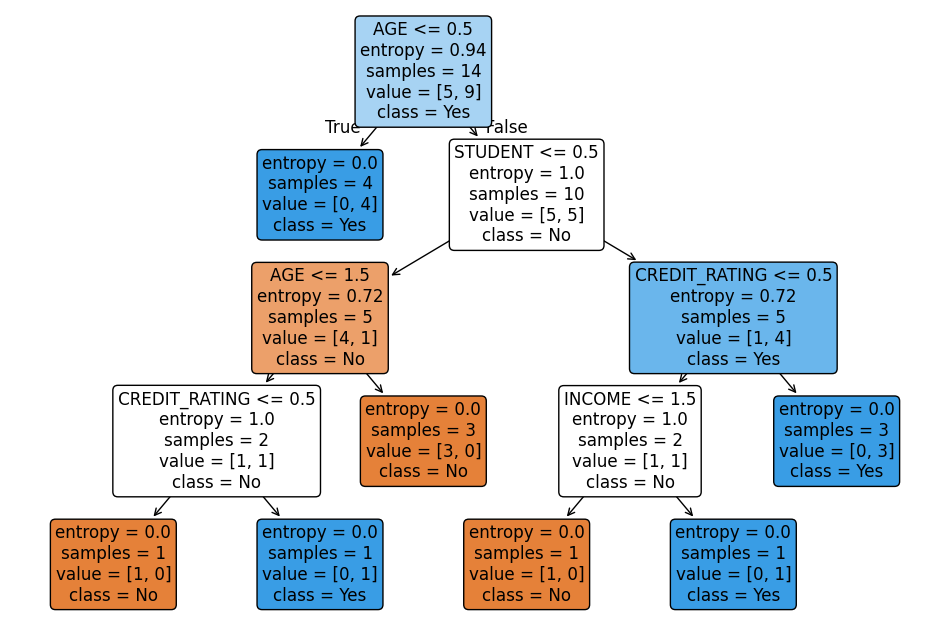

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define dataset as a DataFrame
data = [
    ["youth", "high", "no", "fair", "no"],
    ["youth", "high", "no", "excellent", "no"],
    ["middle_aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle_aged", "low", "yes", "excellent", "yes"],
    ["youth", "medium", "no", "fair", "no"],
    ["youth", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["youth", "medium", "yes", "excellent", "yes"],
    ["middle_aged", "medium", "no", "excellent", "yes"],
    ["middle_aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["AGE", "INCOME", "STUDENT", "CREDIT_RATING", "CLASS:BUYS_COMPUTER"]
df = pd.DataFrame(data, columns=columns)

# Encode categorical features using pandas' category codes
df_encoded = df.copy()
for column in df.columns:
    df_encoded[column] = df[column].astype('category').cat.codes

# Define features (X) and target (y)
X = df_encoded.drop("CLASS:BUYS_COMPUTER", axis=1)  # Features
y = df_encoded["CLASS:BUYS_COMPUTER"]  # Target

# Create a DecisionTreeClassifier model
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the model to the data
clf.fit(X, y)

# Plot the decision tree using Matplotlib
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(clf,
          filled=True,  # Color the nodes based on their class
          feature_names=X.columns.tolist(),  # Feature names
          class_names=["No", "Yes"],  # Class names for the target variable
          rounded=True,  # Rounded nodes
          proportion=False,  # Show proportions in nodes
          precision=2)  # Decimal places for probabilities

# Display the plot
plt.show()


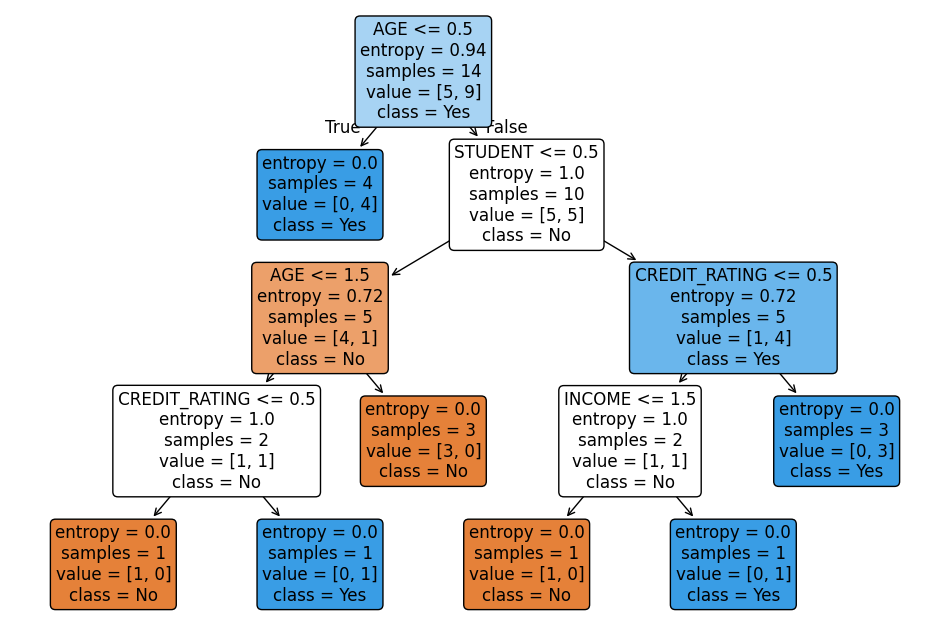

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Define dataset as a DataFrame
data = [
    ["youth", "high", "no", "fair", "no"],
    ["youth", "high", "no", "excellent", "no"],
    ["middle_aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle_aged", "low", "yes", "excellent", "yes"],
    ["youth", "medium", "no", "fair", "no"],
    ["youth", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["youth", "medium", "yes", "excellent", "yes"],
    ["middle_aged", "medium", "no", "excellent", "yes"],
    ["middle_aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["AGE", "INCOME", "STUDENT", "CREDIT_RATING", "CLASS:BUYS_COMPUTER"]
df = pd.DataFrame(data, columns=columns)

# Encode categorical features
label_encoders = {}
df_encoded = df.copy()
for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df_encoded.drop("CLASS:BUYS_COMPUTER", axis=1)  # Features
y = df_encoded["CLASS:BUYS_COMPUTER"]  # Target

# Create a DecisionTreeClassifier model
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the model to the data
clf.fit(X, y)

# Plot the decision tree using Matplotlib
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(clf,
          filled=True,  # Color the nodes based on their class
          feature_names=X.columns.tolist(),  # Feature names
          class_names=["No", "Yes"],  # Class names for the target variable
          rounded=True,  # Rounded nodes
          proportion=False,  # Show proportions in nodes
          precision=2)  # Decimal places for probabilities

# Display the plot
plt.show()

In [4]:
def predict_purchase():
    print("\nEnter the following details to predict if the user will buy a computer:")
    user_input = {}

    for column in X.columns:
        options = list(label_encoders[column].classes_)
        print(f"{column} options: {options}")
        value = input(f"Enter {column}: ")
        while value not in options:
            print("Invalid input! Please enter a valid option.")
            value = input(f"Enter {column}: ")
        user_input[column] = label_encoders[column].transform([value])[0]

    user_df = pd.DataFrame([user_input])
    prediction = clf.predict(user_df)[0]
    result = label_encoders["CLASS:BUYS_COMPUTER"].inverse_transform([prediction])[0]
    print(f"\nPrediction: The user will {result.upper()} buy a computer.")

# Ask user for input and predict
predict_purchase()


Enter the following details to predict if the user will buy a computer:
AGE options: ['middle_aged', 'senior', 'youth']
Enter AGE: 21
Invalid input! Please enter a valid option.
Enter AGE: young
Invalid input! Please enter a valid option.
Enter AGE: youth
INCOME options: ['high', 'low', 'medium']
Enter INCOME: low
STUDENT options: ['no', 'yes']
Enter STUDENT: yes
CREDIT_RATING options: ['excellent', 'fair']
Enter CREDIT_RATING: fair

Prediction: The user will YES buy a computer.


In [6]:
def predict_purchase():
    print("\nEnter the following details to predict if the user will buy a computer:")
    user_input = {}

    for column in X.columns:
        options = list(label_encoders[column].classes_)
        print(f"{column} options: {options}")
        value = input(f"Enter {column}: ")
        while value not in options:
            print("Invalid input! Please enter a valid option.")
            value = input(f"Enter {column}: ")
        user_input[column] = label_encoders[column].transform([value])[0]

    user_df = pd.DataFrame([user_input])
    prediction = nb_classifier.predict(user_df)[0]
    result = label_encoders["CLASS:BUYS_COMPUTER"].inverse_transform([prediction])[0]
    print(f"\nPrediction: The user will {result.upper()} buy a computer.")

from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X, y)
predict_purchase()


Enter the following details to predict if the user will buy a computer:
AGE options: ['middle_aged', 'senior', 'youth']
Enter AGE: senior
INCOME options: ['high', 'low', 'medium']
Enter INCOME: low
STUDENT options: ['no', 'yes']
Enter STUDENT: no
CREDIT_RATING options: ['excellent', 'fair']
Enter CREDIT_RATING: excellent

Prediction: The user will NO buy a computer.


Naive Bayesian Classifier with Random Continuous Features!!!
Predicted output: [0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1]
Actual output: [0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0]
Accuracy of prediction: 0.44


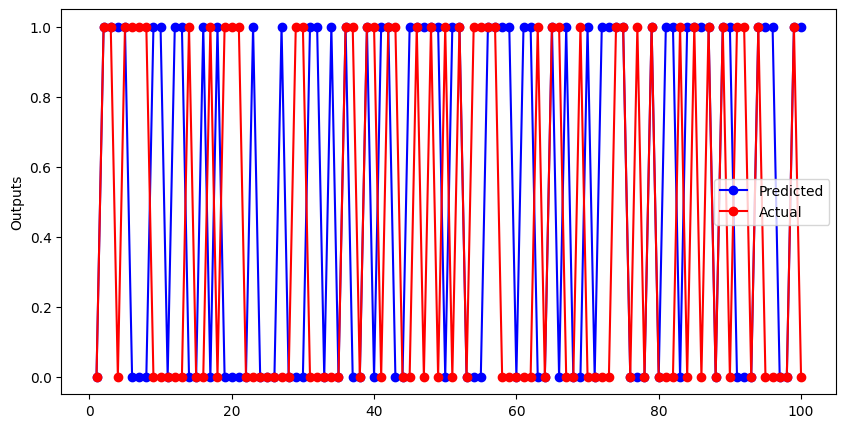

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

print("Naive Bayesian Classifier with Random Continuous Features!!!")

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(200, 2) * 100  # Generating 200 samples with 2 continuous features (e.g., Salary & Age)
y = np.random.choice([0, 1], size=200)  # Binary classification (0: No, 1: Yes)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Train Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
predicted = gnb.predict(X_test)

print("Predicted output:", predicted)
print("Actual output:", y_test)
print("Accuracy of prediction:", gnb.score(X_test, y_test))

# Convert to numpy arrays for plotting
predicted = np.array(predicted)
actual = np.array(y_test)
y_axis = np.arange(1, len(y_test) + 1)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_axis, predicted, color='blue', marker='o', label="Predicted")
plt.plot(y_axis, actual, color='red', marker='o', label="Actual")
plt.ylabel("Outputs")
plt.legend()
plt.show()


Feature Data (X):
           AGE        INCOME  CREDIT_SCORE
0   41.050167  25682.884656    587.016577
1   48.037953  26970.343976    528.064067
2   43.316062  21617.471795    445.505587
3   40.885094  86609.587644    725.828529
4   35.793502  82252.540076    550.882683
5   45.127553  89600.971860    612.638672
6   36.378663  98289.467379    310.334390
7   55.454466  83932.685137    639.699523
8   58.473836  56918.348980    636.652647
9   34.104544  82442.334103    639.313698
10  51.252452  29461.954070    819.061443
11  40.213587  71193.681706    675.001165
12  41.857872  31468.262993    497.729345
13  56.875059  95573.513364    540.367575 

Target (y):
 0     1
1     1
2     1
3     1
4     1
5     0
6     1
7     1
8     0
9     0
10    1
11    0
12    0
13    1
Name: buys_computer, dtype: int64 

Predicted Output: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
Actual Output   : [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]


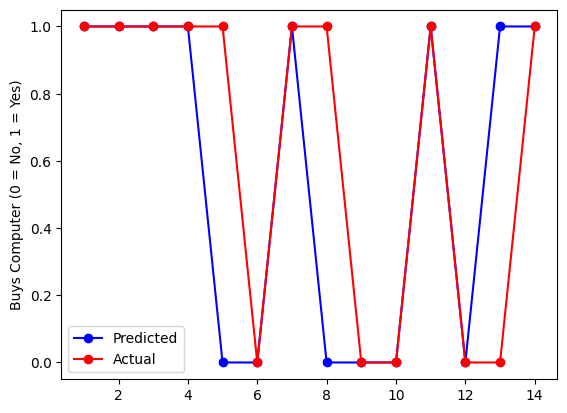

Accuracy of prediction: 0.7857142857142857


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Generate random continuous data for features (AGE, INCOME, CREDIT_SCORE, etc.)
np.random.seed(0)
num_samples = 14

data = {
    "AGE": np.random.uniform(18, 60, num_samples),  # Age between 18-60
    "INCOME": np.random.uniform(20000, 100000, num_samples),  # Income range
    "CREDIT_SCORE": np.random.uniform(300, 850, num_samples),  # Credit score range
    "buys_computer": np.random.choice([0, 1], num_samples)  # Target (0: No, 1: Yes)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target variable
X = df.drop(columns=["buys_computer"])
y = df["buys_computer"]

print("Feature Data (X):\n", X, "\n")
print("Target (y):\n", y, "\n")

# Initialize and train Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X, y)

# Predictions
predicted = gnb.predict(X)
print("Predicted Output:", list(predicted))
print("Actual Output   :", list(y))

# Convert to numpy arrays for visualization
predicted = np.array(predicted)
actual = np.array(y)
y_axis = np.arange(1, len(y) + 1)

# Plot predictions vs actual
plt.plot(y_axis, predicted, color="blue", marker="o", label="Predicted")
plt.plot(y_axis, actual, color="red", marker="o", label="Actual")
plt.ylabel("Buys Computer (0 = No, 1 = Yes)")
plt.legend()
plt.show()

# Print model accuracy
print("Accuracy of prediction:", gnb.score(X, y))
